# Q.2 - Random Forest Regression

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Load Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [3]:
df= pd.read_csv('F:/python/Data 2.csv')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
X = df.drop('PE',axis=1)
y = df['PE']

print('Shape of X = ',X.shape)
print('Shape of y = ',y.shape)

Shape of X =  (9568, 4)
Shape of y =  (9568,)


# Split Data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)
print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_test= ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (7654, 4)
Shape of y_train =  (7654,)
Shape of X_test=  (1914, 4)
Shape of y_test =  (1914,)


# Random Forest Regression - ML Model Training

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
Regressor = RandomForestRegressor(n_estimators = 100,criterion = 'mse')
Regressor.fit(X_train,y_train)

RandomForestRegressor(criterion='mse')

# R square for given algo

In [9]:
Regressor.score(X_test,y_test)

0.9645589480121902

In [10]:
y_pred = Regressor.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_test,y_pred)

0.9645589480121902

Text(0.5, 1.0, 'Actual vs. Predicted')

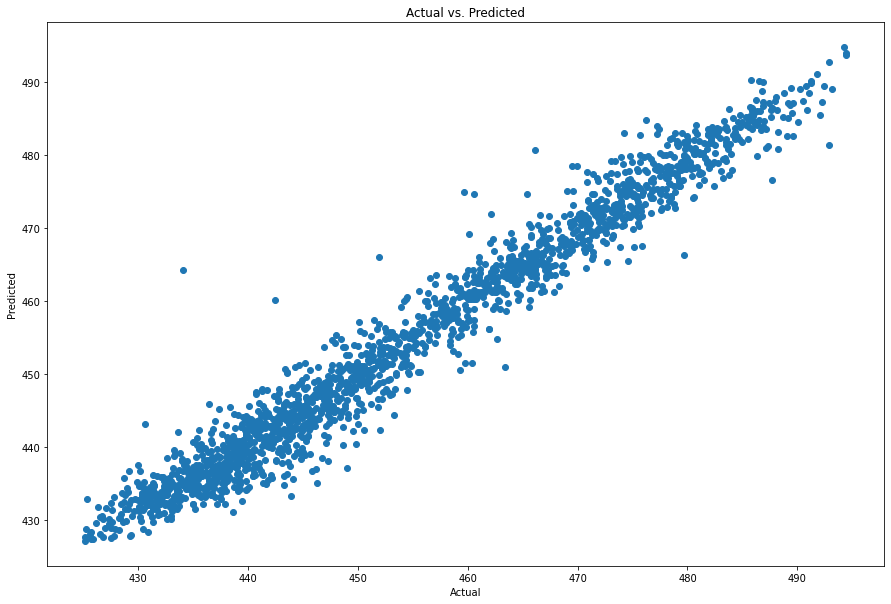

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

# Predict the value of PE

In [14]:
X_test.iloc[-1,:]

AT      23.50
V       59.21
AP    1018.29
RH      63.00
Name: 926, dtype: float64

In [15]:
Regressor.predict([X_test.iloc[-1,:]])

array([445.6103])

In [16]:
y_test.iloc[-1]

443.31

In [17]:
pred = Regressor.predict(X_test)
pred

array([432.4235, 482.6259, 474.0653, ..., 446.1699, 457.7563, 445.6103])

In [18]:
y_test

7683    430.29
3763    484.45
9521    472.16
7691    434.99
9205    432.99
         ...  
5742    453.28
3372    478.27
4248    443.48
4867    458.62
926     443.31
Name: PE, Length: 1914, dtype: float64

In [19]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted value,Difference
7683,430.29,432.4235,-2.1335
3763,484.45,482.6259,1.8241
9521,472.16,474.0653,-1.9053
7691,434.99,432.1465,2.8435
9205,432.99,432.6594,0.3306
6310,465.61,470.6357,-5.0257
3167,477.50,473.6792,3.8208
3617,449.80,446.7665,3.0335
3244,476.89,476.8246,0.0654
6316,451.47,448.1577,3.3123


# Mean_Squared_error

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

mse,rmse

(10.198342555825501, 3.1934843910414688)